# Data Literacy
#### University of Tübingen, Winter Term 2021/22
## Exercise Sheet 7
&copy; 2021 Prof. Dr. Jakob Macke & Marius Hobbhahn

This sheet is **due on Monday, December 13, 2021 at 10am sharp (i.e. before the start of the lecture).**

---

## Regression - part II

Last week we focused on implementing linear regression on our own. This week, we will use packaged functions from scikit learn. We will start with logistic regression and then look into multi-dimensional inputs, regularization and cross validation.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Part I: 1-dimensional logistic regression

Regression can also be used to predict probabilities given binary events. For this, we will start using sklearn.

**Tasks:**
1. Import the exams.csv data and use the sklearn tool LogisticRegression
2. Plot the resulting values with the fitted function

In [3]:
from sklearn.linear_model import LogisticRegression

In [20]:
### import the dataset 
exam_data = pd.read_csv('exams.csv', index_col=0)
exam_data.sort_values(by='hours_studied', inplace=True)
exam_data.head()

,hours_studied,exam_passed
0,0.50,0
1,0.75,0
2,1.00,0
3,1.25,0
4,1.50,0


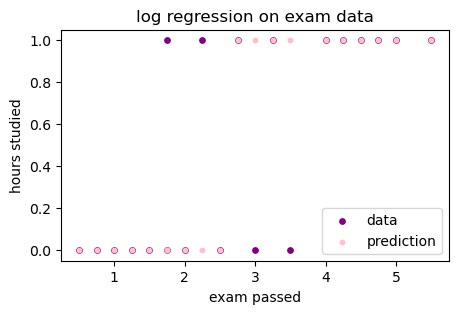

In [37]:
### run regression and plot
X = exam_data['hours_studied'].values.reshape(-1, 1)
y = exam_data['exam_passed'].values
fit = LogisticRegression().fit(X, y)
prediction = fit.predict(X)

plt.figure(figsize=(5, 3))
plt.scatter(X, y, color='purple', s=15, label='data')
plt.scatter(X, prediction, color='pink', s=10, label='prediction')
plt.xlabel('exam passed')
plt.ylabel('hours studied')
plt.title('log regression on exam data')
plt.legend()
plt.show();

### Part II: multi-dimensional linear regression

Now that we have a good intuition, we will scale the process to multiple input dimensions.

We will use data on life expectancy which can be found here: https://www.kaggle.com/kumarajarshi/life-expectancy-who

**Tasks:** 

1. Import the life_expectancy.csv data
2. Use sklearn's LinearRegression to fit the data
3. Make a plot of the coefficients. What do they mean? How can we interpret the results? 
4. If find a problem with the coefficients, suggest and implement a solution.

In [121]:
from sklearn.linear_model import LinearRegression

In [149]:
### import data
life_data = pd.read_csv('life_expectancy.csv', index_col=0)
life_data.sort_values(by='Life expectancy ', inplace=True)
life_data

,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
1583,44.0,67.0,46,1.10,3.885395,64.0,92,14.8,75,79.0,4.82,64.0,24.7,29.979898,1213711.0,7.7,7.6,0.388,10.4
2933,44.3,723.0,27,4.36,0.000000,68.0,31,27.1,42,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
1484,44.5,675.0,5,2.67,57.903698,87.0,0,27.4,6,88.0,6.30,89.0,34.8,862.946312,1949543.0,9.3,9.2,0.437,10.7
2934,44.5,715.0,26,4.06,0.000000,7.0,998,26.7,41,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2932,44.6,717.0,28,4.14,8.717409,65.0,420,27.5,43,69.0,6.44,68.0,30.3,444.765750,129432.0,9.0,9.0,0.406,9.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
937,89.0,88.0,3,11.90,7002.785925,47.0,604,59.1,3,98.0,1.57,98.0,0.1,45413.657100,6437499.0,0.6,0.6,0.877,16.1
2056,89.0,78.0,0,9.88,271.254553,98.0,0,6.9,0,98.0,9.50,98.0,0.1,2277.536130,14162.0,0.7,0.5,0.837,16.8
995,89.0,69.0,2,11.03,941.756291,88.0,443,61.9,3,94.0,11.30,95.0,0.1,4792.652880,89825.0,1.1,1.1,0.920,17.0
241,89.0,76.0,0,12.60,7163.348923,98.0,70,63.4,1,99.0,1.59,99.0,0.1,47439.396840,112957.0,1.0,1.0,0.890,16.3


In [158]:
### run regression
X = life_data.iloc[:, 1:].values
y = life_data['Life expectancy '].values.reshape(-1, 1)
fit = LinearRegression().fit(X, y)
prediction = fit.predict(X)

coefs = fit.coef_
coefs.shape

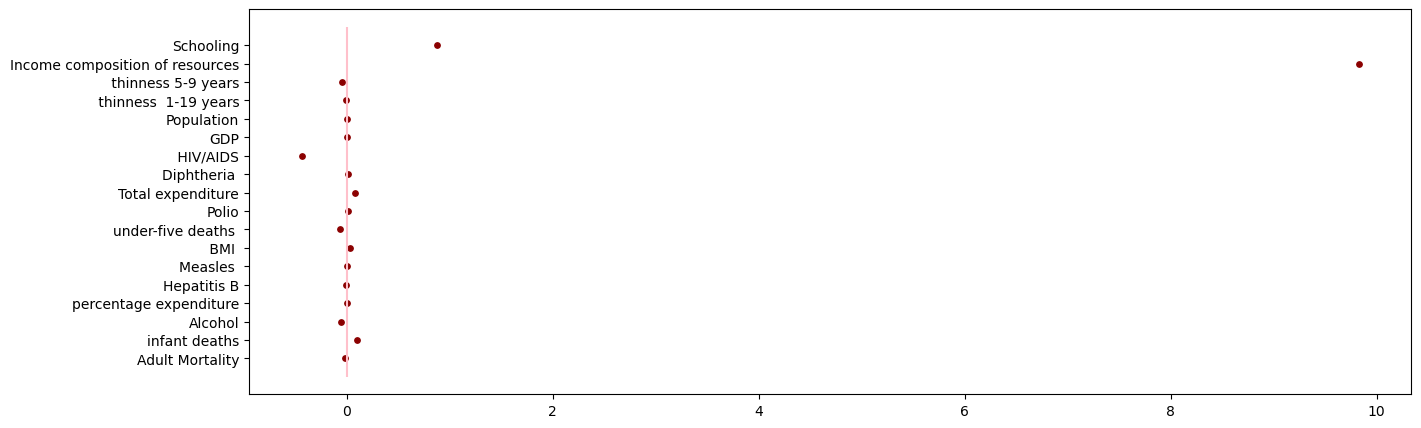

In [160]:
plt.figure(figsize=(12, 5))
y = np.arange(1, 19, 1)
plt.scatter(coefs, y, s=15, color='darkred')
plt.yticks(y, labels=life_data.columns[1:])
plt.vlines(0, 0, 19, color='pink')
plt.show()

### How can you interpret these results?
From these weights it would seem that income composition of resources and schooling have the highest (positive) correlation with life expectancy. HIV/Aids has the strongest negative correlation. All other feautures have a coefficient close to 0. Since the features could correlate between each other, the coefficients are hard to interpret. E.g. the positive weight of infant deaths might be caused by sick children not dying before the age of 5 due to a good health system. Moreover, the input features are not normalized, therefore it is hard to compare between them: we can only draw conclusions about positive or negative correlations.

In [173]:
### Fix problem
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
life_data_trans = pd.DataFrame(std_scaler.fit_transform(life_data.iloc[:, 1:]), columns=life_data.columns[1:])
life_data_trans.head()

,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,-0.807961,0.111306,-0.852340,-0.395229,-0.594514,-0.211499,-1.181300,0.189009,-0.203379,-0.494162,-0.934296,3.766855,-0.482553,-0.190802,0.619719,0.578684,-1.330640,-0.615447
1,4.428626,-0.045965,-0.042998,-0.397439,-0.438245,-0.217549,-0.558461,-0.013633,-0.738049,0.510759,-0.887941,5.242678,-0.445561,-0.026635,0.989458,0.965586,-1.226833,-1.044856
2,4.045461,-0.228068,-0.462565,-0.364514,0.304033,-0.220624,-0.543269,-0.234697,0.197624,0.149683,0.224579,5.441666,-0.409947,-0.180356,0.967709,0.922597,-1.062929,-0.508095
3,4.364766,-0.054242,-0.117478,-0.397439,-2.821346,-0.121643,-0.578715,-0.019774,-3.411399,0.245390,-0.748876,5.756729,-0.445650,-0.028673,1.076455,1.073058,-1.166735,-0.937503
4,4.380731,-0.037688,-0.097616,-0.392482,-0.555446,-0.178969,-0.538206,-0.007492,-0.648937,0.210588,-0.748876,4.695463,-0.446398,-0.206195,0.902461,0.879607,-1.232297,-1.009072


In [174]:
### run regression
X = life_data_trans.values
y = life_data['Life expectancy '].values.reshape(-1, 1)
fit = LinearRegression().fit(X, y)
prediction = fit.predict(X)

coefs = fit.coef_
coefs.shape

(1, 18)

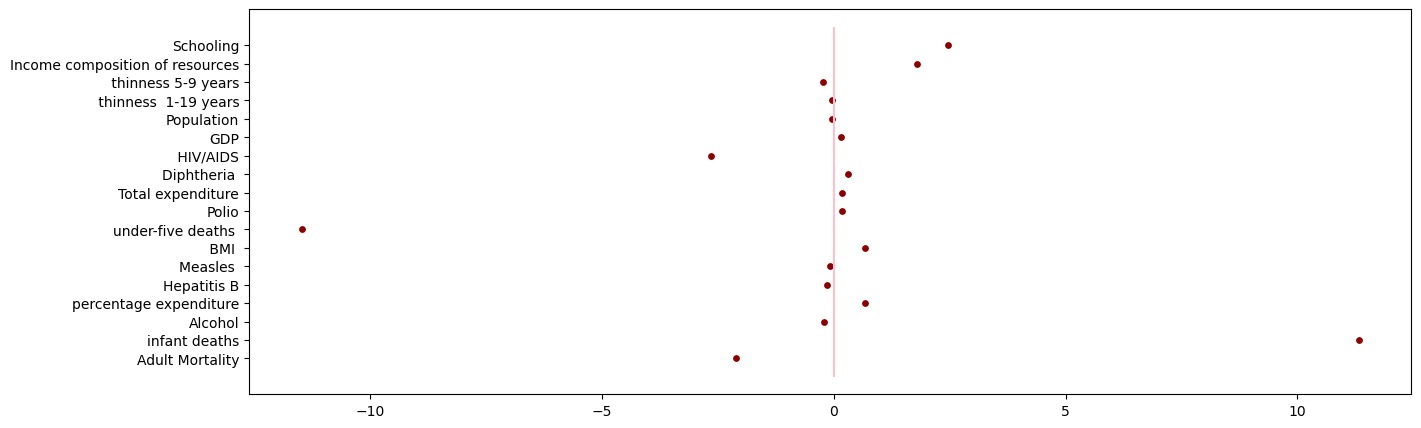

In [175]:
plt.figure(figsize=(12, 5))
y = np.arange(1, 19, 1)
plt.scatter(coefs, y, s=15, color='darkred')
plt.yticks(y, labels=life_data.columns[1:])
plt.vlines(0, 0, 19, color='pink')
plt.show()

### Part III: Regularization

We will use the data on life expectancy once again. This time, however, we will regularize our regression.

**Tasks:**

1. Use Ridge and Lasso from sklearn to fit the data. 
2. What is supposed to change between regularized and unregularized regression? Can you see this difference in practice?

In [176]:
from sklearn.linear_model import Lasso, Ridge

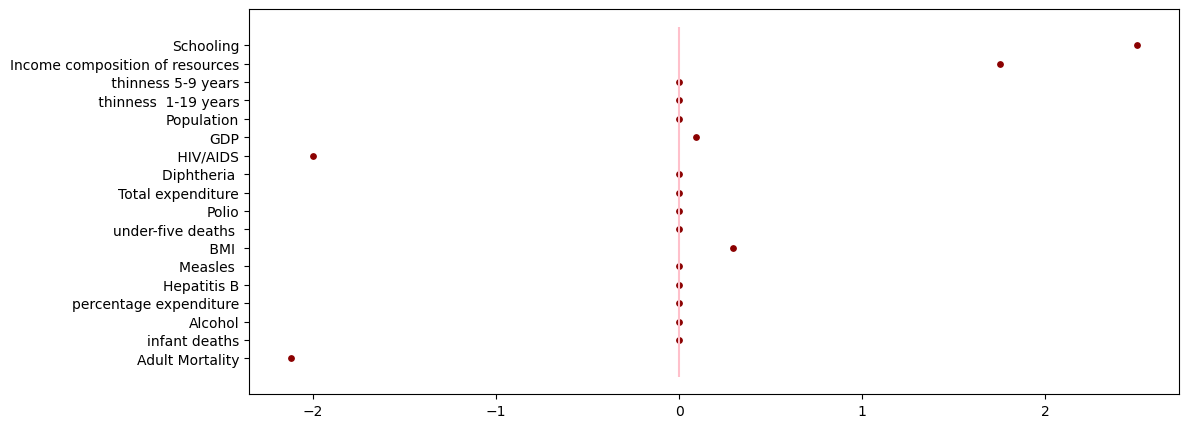

In [179]:
### fit and plot Lasso
X = life_data_trans.values
y = life_data['Life expectancy '].values.reshape(-1, 1)
fit = Lasso().fit(X, y)
prediction = fit.predict(X)

coefs = fit.coef_

plt.figure(figsize=(12, 5))
y = np.arange(1, 19, 1)
plt.scatter(coefs, y, s=15, color='darkred')
plt.yticks(y, labels=life_data.columns[1:])
plt.vlines(0, 0, 19, color='pink')
plt.show()

Lasso regularization is supposed to force feature weights to be set to 0. This can be seen very well from the points on the pink line. Interestingly, the under-five-deaths have been changed from a very negative coefficient to 0. This is probably due to the model not overfitting to outliers anymore.

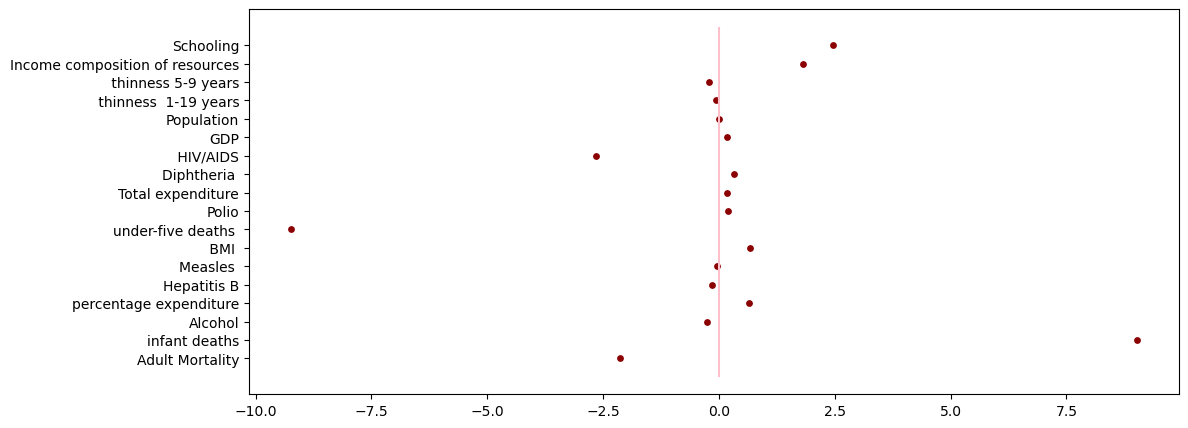

In [180]:
### fit and plot Ridge
X = life_data_trans.values
y = life_data['Life expectancy '].values.reshape(-1, 1)
fit = Ridge().fit(X, y)
prediction = fit.predict(X)

coefs = fit.coef_

plt.figure(figsize=(12, 5))
y = np.arange(1, 19, 1)
plt.scatter(coefs, y, s=15, color='darkred')
plt.yticks(y, labels=life_data.columns[1:])
plt.vlines(0, 0, 19, color='pink')
plt.show()

Ridge regularization pushes weights towards a smaller value. Compared to the plot from part 2, the weights seem a bit smaller.

### Part IV: cross validation

To find out how much we should optimally regularize, we use cross validation

**Tasks:**
1. Use sklearn to apply cross validation to Ridge and Lasso regression. Which values of alpha yield the best results?
2. Can you interpret these results? What does a small or large value of alpha imply?

In [183]:
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LassoCV, RidgeCV

In [199]:
### make CV pipeline
X = life_data_trans.values
y = life_data['Life expectancy '].values

lasso_cv = LassoCV(cv=5).fit(X, y)
print(f'best alpha lasso: {lasso_cv.alpha_}')

ridge_cv = RidgeCV(cv=5, alphas=np.linspace(0, 20, 200)).fit(X, y)
print(f'best alpha ridge: {ridge_cv.alpha_}')

best alpha lasso: 0.03661685605126965
best alpha ridge: 7.437185929648241


A large alpha implies a strong regularization. This means the model overfits on the training data and requires a higher regularization strength in order to generalize well on the data fold used for testing.

### Final questions

1. Which kind of pitfalls did you notice during your application of different methods of regression?
2. How did you solve these pitfalls? 
3. If you come across linear regression coefficients in a paper, which kind of questions would come to your mind about these coefficients?
4. If you come across linear regression in a paper that claims to show a causal relationship, what do you look for in the paper?

### answer final high level questions:
1. The features lie on different scales and possibly correlate. This leads to coefficients being hard to interpret. Moreover, the model overfitting on the data has led to some features having large weights.
2. We tried to facilitate the comparison between weights by z-standardizing the features. The Lasso regression might help with correlation effects since it pushes feature weights towards 0. \
    However, it could also set those features to 0 that are causally connected to the data. It might be more sensible to check for correlations between features beforehand. \
        The regularization prevents overfitting on the training data and thus improves identifying the most important coefficients.
3. Did they regularize? Are the features normalized? Do the features correlate? Is there a nonlinear function applied to the data?
4. We look for a control group that randomly includes all relevant features. If there is still an effect of the remaining feature, it can assumed to have a causal relationship. 